In [2]:
import bagpy
from bagpy import bagreader
from data import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import math

a = bagreader("data/5_hr_data.bag")
b = bagreader("data/15_min_data.bag")

long_msg = a.message_by_topic('/imu')
short_msg = b.message_by_topic('/imu')

long= pd.read_csv(long_msg)
short = pd.read_csv(short_msg)




[INFO]  Data folder data/5_hr_data already exists. Not creating.
[INFO]  Data folder data/15_min_data already exists. Not creating.


In [4]:

short['Time'] = short['Time'] - short['Time'].min()
long['Time'] = long['Time'] - long['Time'].min()

short['t0'] = +2.0 * (short['IMU.orientation.w'] * short['IMU.orientation.x'] + short['IMU.orientation.y'] * short['IMU.orientation.z'])
short['t1'] = +1.0 - 2.0 * (short['IMU.orientation.x'] * short['IMU.orientation.x'] + short['IMU.orientation.y'] * short['IMU.orientation.y'])
short['roll'] = np.arctan(short['t0'] / short['t1'])

short['t2'] = +2.0 * (short['IMU.orientation.w'] * short['IMU.orientation.y'] - short['IMU.orientation.z'] * short['IMU.orientation.x'])
short['t2'] = np.where(short['t2'] > +1.0, +1.0, short['t2'])
short['t2'] = np.where(short['t2'] < -1.0, -1.0, short['t2'])
short['pitch'] = np.arcsin(short['t2'])

short['t3'] = +2.0 * (short['IMU.orientation.w'] * short['IMU.orientation.z'] + short['IMU.orientation.x'] * short['IMU.orientation.y']) 
short['t4'] = +1.0 - 2.0 * (short['IMU.orientation.y'] * short['IMU.orientation.y'] + short['IMU.orientation.z'] * short['IMU.orientation.z']) 
short['yaw'] = np.arctan(short['t3'] / short['t4'])


# long['t0'] = +2.0 * (long['IMU.orientation.w'] * long['IMU.orientation.x'] + long['IMU.orientation.y'] * long['IMU.orientation.z'])
# long['t1'] = +1.0 - 2.0 * (long['IMU.orientation.x'] * long['IMU.orientation.x'] + long['IMU.orientation.y'] * long['IMU.orientation.y'])
# long['roll'] = math.atan2(long['t0'], long['t1'])

# long['t2'] = +2.0 * (long['IMU.orientation.w'] * long['IMU.orientation.y'] - long['IMU.orientation.z'] * long['IMU.orientation.x'])
# long['t2'] = np.where(long['t2'] > +1.0, +1.0, long['t2'])
# long['t2'] = np.where(long['t2'] < -1.0, -1.0, long['t2'])
# long['pitch'] = math.asin(long['t2'])

# long['t3'] = +2.0 * (long['IMU.orientation.w'] * long['IMU.orientation.z'] + long['IMU.orientation.x'] * long['IMU.orientation.y']) 
# long['t4'] = +1.0 - 2.0 * (long['IMU.orientation.y'] * long['IMU.orientation.y'] + long['IMU.orientation.z'] * long['IMU.orientation.z']) 
# long['yaw'] = math.atan2(long['t3'], long['t4'])



long.to_csv("data/long.csv", index=False)
short.to_csv("data/short.csv", index=False)






In [8]:

#Plotting
# ax_good_stat = good_stat.plot(x ='UTM_easting(scaled)', y ="UTM_northing(scaled)", kind = "scatter",figsize = (8,8) ,title = "Open Field Stationary Data in UTM")
# ax_good_stat.set_ylabel("UTM Northing (meters)")
# ax_good_stat.set_xlabel("UTM Easting (meters)")

#Short Data set
#Mean and STD dev df['points'].std()  df["Fee"].mean() [["Fee","Discount"]]
#Linear acceleration
lin_acc_xyz_short_std = short[["IMU.linear_acceleration.x","IMU.linear_acceleration.y","IMU.linear_acceleration.z"]].std()
lin_acc_xyz_short_mean = short[["IMU.linear_acceleration.x","IMU.linear_acceleration.y","IMU.linear_acceleration.z"]].mean()


# #Angular Velocity
ang_vel_xyz_short_std = short[["IMU.angular_velocity.x","IMU.angular_velocity.y","IMU.angular_velocity.z"]].std()
ang_vel_xyz_short_mean = short[["IMU.angular_velocity.x","IMU.angular_velocity.y","IMU.angular_velocity.z"]].mean()


# #Magentic Field
mag_xyz_short_std = short[["MagField.magnetic_field.x","MagField.magnetic_field.y","MagField.magnetic_field.z"]].std()
mag_xyz_short_mean = short[["MagField.magnetic_field.x","MagField.magnetic_field.y","MagField.magnetic_field.z"]].mean()


#roll pitch yaw
orient_short_std = short[["IMU.orientation.x","IMU.orientation.y","IMU.orientation.z"]].std()
oreint_short_mean = short[["IMU.orientation.x","IMU.orientation.y","IMU.orientation.z"]].mean()



print(lin_acc_xyz_short_std,lin_acc_xyz_short_mean,
ang_vel_xyz_short_std,ang_vel_xyz_short_mean,
mag_xyz_short_std,mag_xyz_short_mean,
orient_short_std,oreint_short_mean)

IMU.linear_acceleration.x    0.042392
IMU.linear_acceleration.y    0.062734
IMU.linear_acceleration.z    0.026804
dtype: float64 IMU.linear_acceleration.x   -0.532788
IMU.linear_acceleration.y   -0.960436
IMU.linear_acceleration.z   -9.622933
dtype: float64 IMU.angular_velocity.x    0.005719
IMU.angular_velocity.y    0.002371
IMU.angular_velocity.z    0.002557
dtype: float64 IMU.angular_velocity.x   -0.000046
IMU.angular_velocity.y    0.000022
IMU.angular_velocity.z   -0.000010
dtype: float64 MagField.magnetic_field.x    0.003197
MagField.magnetic_field.y    0.005025
MagField.magnetic_field.z    0.002888
dtype: float64 MagField.magnetic_field.x   -0.005890
MagField.magnetic_field.y    0.110874
MagField.magnetic_field.z    0.490503
dtype: float64 IMU.orientation.x    0.002979
IMU.orientation.y    0.003562
IMU.orientation.z    0.002449
dtype: float64 IMU.orientation.x   -0.050137
IMU.orientation.y   -0.543724
IMU.orientation.z    0.837323
dtype: float64


In [9]:

lin_acc_xyz_long_std = long[["IMU.linear_acceleration.x","IMU.linear_acceleration.y","IMU.linear_acceleration.z"]].std()
lin_acc_xyz_long_mean = long[["IMU.linear_acceleration.x","IMU.linear_acceleration.y","IMU.linear_acceleration.z"]].mean()

ang_vel_xyz_long_std = long[["IMU.angular_velocity.x","IMU.angular_velocity.y","IMU.angular_velocity.z"]].std()
ang_vel_xyz_long_mean = long[["IMU.angular_velocity.x","IMU.angular_velocity.y","IMU.angular_velocity.z"]].mean()

mag_xyz_long_std = long[["MagField.magnetic_field.x","MagField.magnetic_field.y","MagField.magnetic_field.z"]].std()
mag_xyz_long_mean = long[["MagField.magnetic_field.x","MagField.magnetic_field.y","MagField.magnetic_field.z"]].mean()

orient_long_std = long[["IMU.orientation.x","IMU.orientation.y","IMU.orientation.z"]].std()
orient_long_mean = long[["IMU.orientation.x","IMU.orientation.y","IMU.orientation.z"]].mean()

print(lin_acc_xyz_long_std,lin_acc_xyz_long_mean, 
ang_vel_xyz_long_std,ang_vel_xyz_long_mean,
mag_xyz_long_std,mag_xyz_long_mean,
orient_long_std,orient_long_mean)

IMU.linear_acceleration.x    0.013016
IMU.linear_acceleration.y    0.011644
IMU.linear_acceleration.z    0.016704
dtype: float64 IMU.linear_acceleration.x   -0.011431
IMU.linear_acceleration.y    0.169037
IMU.linear_acceleration.z   -9.609361
dtype: float64 IMU.angular_velocity.x    0.000605
IMU.angular_velocity.y    0.001967
IMU.angular_velocity.z    0.000603
dtype: float64 IMU.angular_velocity.x    2.074393e-06
IMU.angular_velocity.y    6.352467e-07
IMU.angular_velocity.z    1.126691e-06
dtype: float64 MagField.magnetic_field.x    0.001496
MagField.magnetic_field.y    0.004935
MagField.magnetic_field.z    0.005746
dtype: float64 MagField.magnetic_field.x    0.175397
MagField.magnetic_field.y    0.131415
MagField.magnetic_field.z    0.445144
dtype: float64 IMU.orientation.x    0.000066
IMU.orientation.y    0.000154
IMU.orientation.z    0.000436
dtype: float64 IMU.orientation.x   -0.007423
IMU.orientation.y    0.004746
IMU.orientation.z   -0.594253
dtype: float64


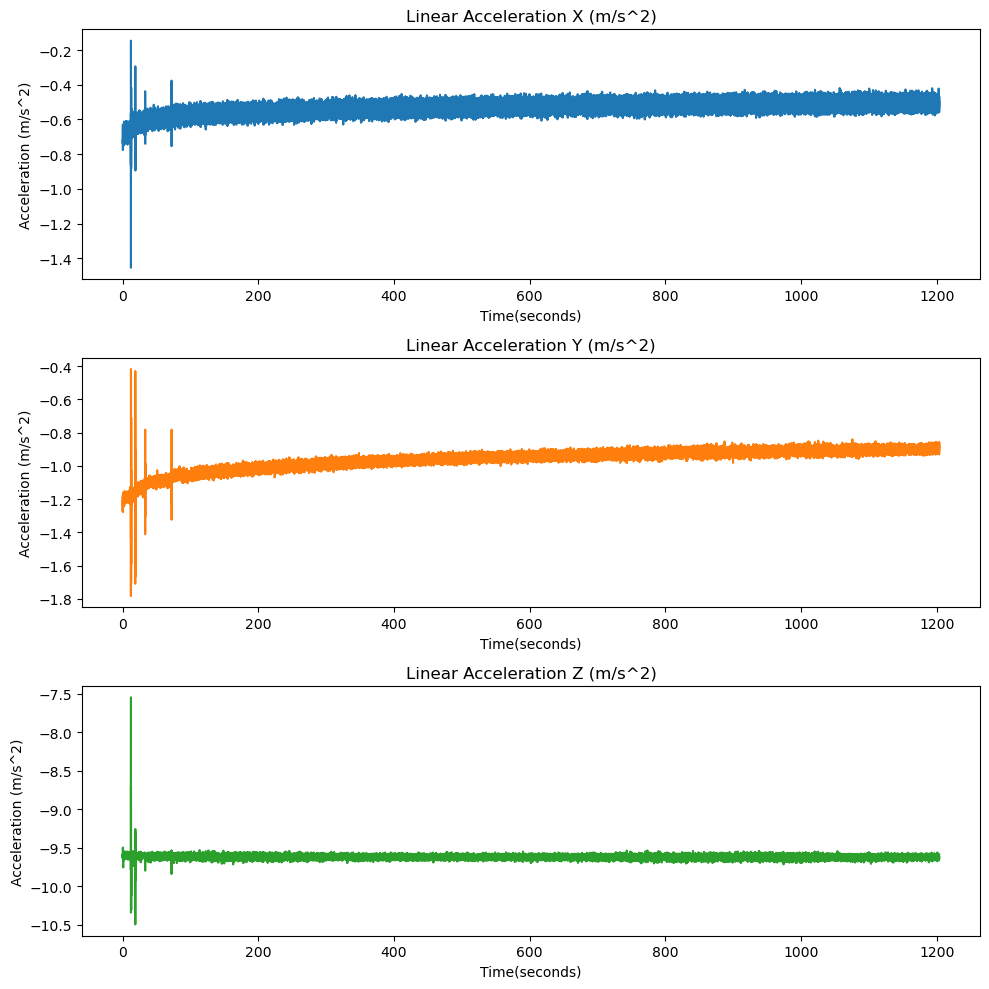

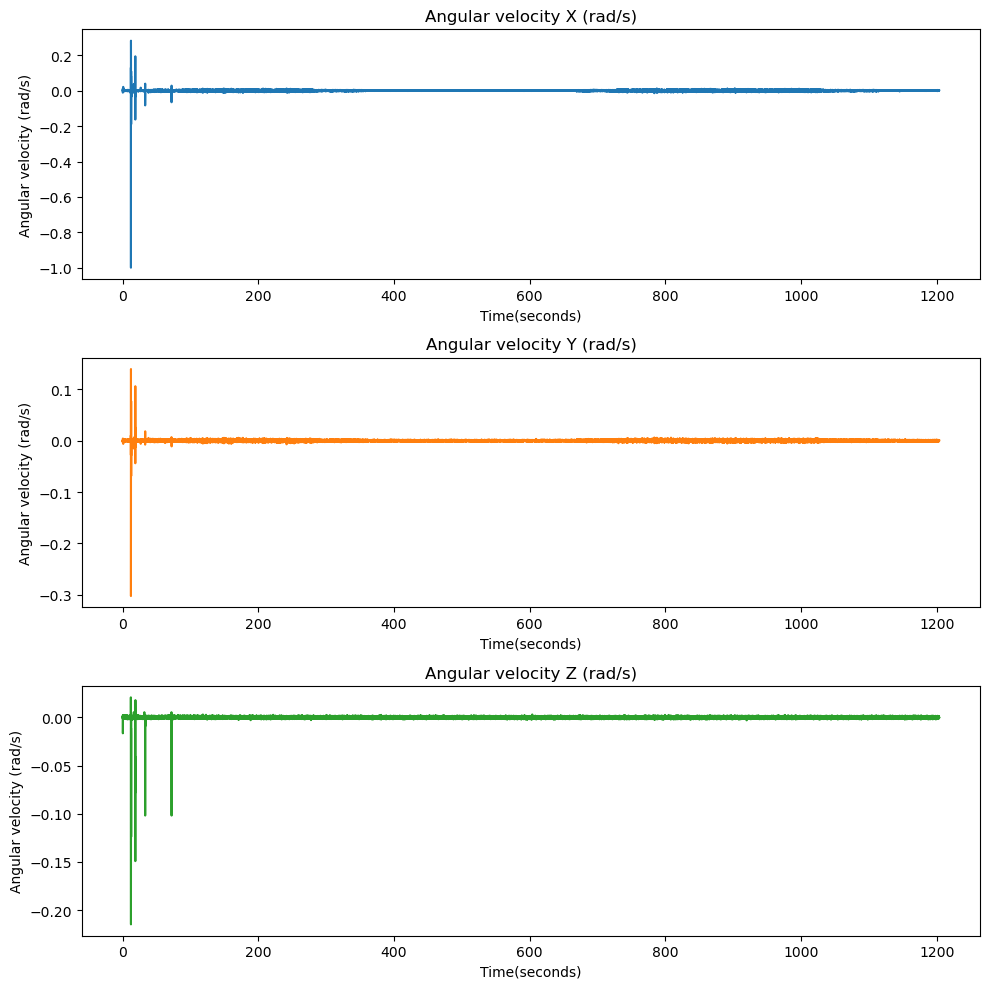

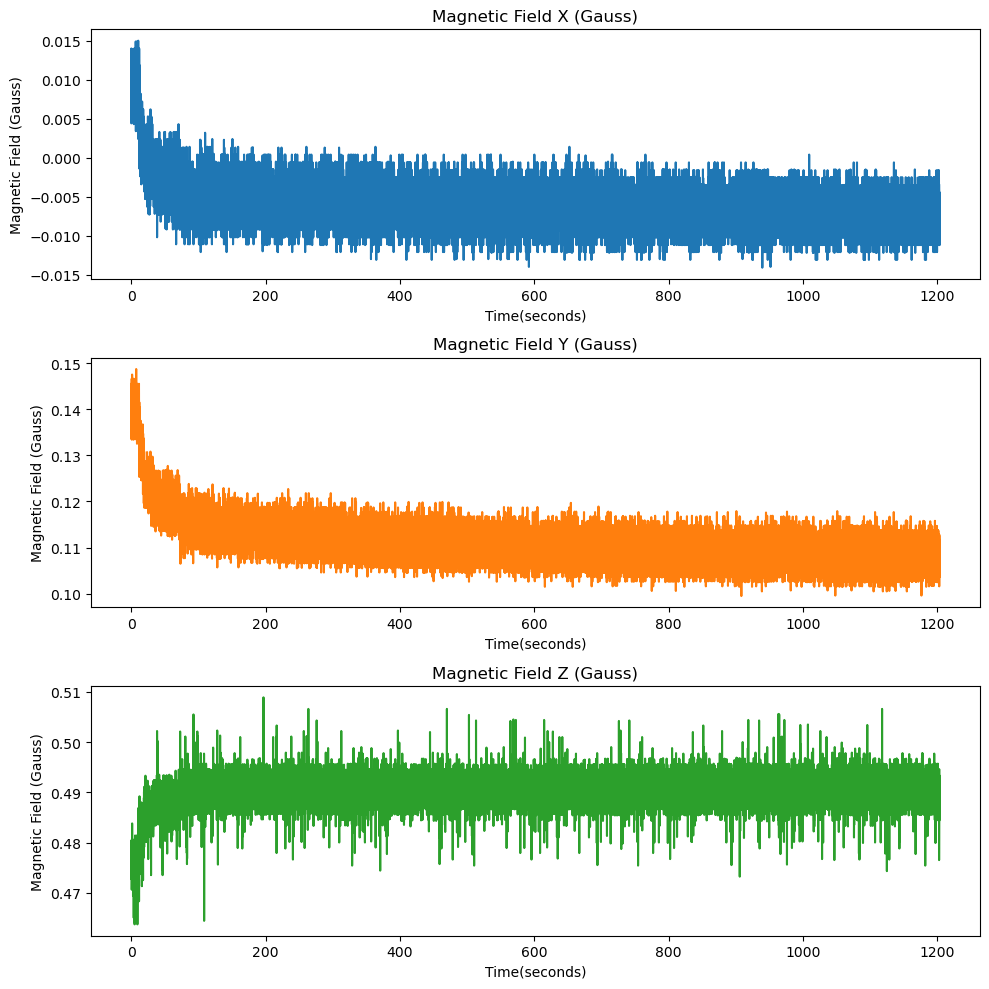

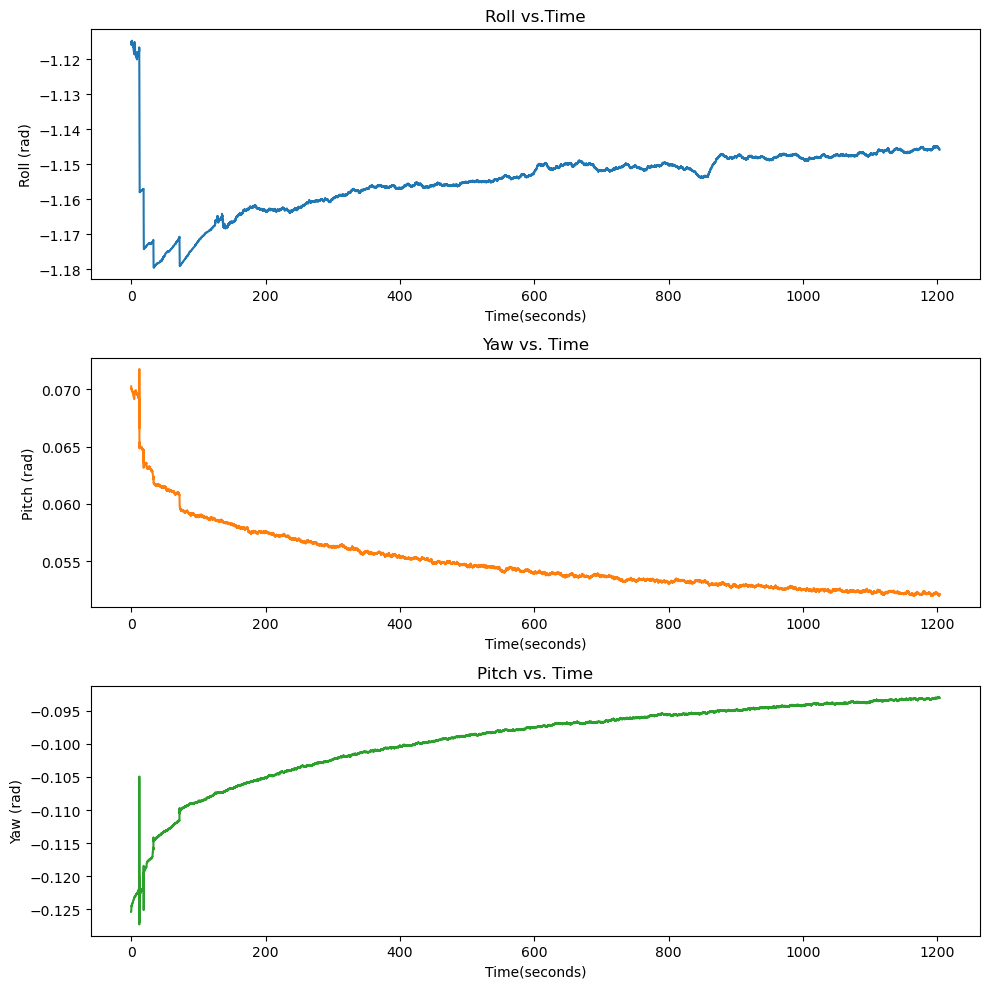

In [5]:
#Lin Accel
fig1, ax1 = plt.subplots(nrows = 3, ncols = 1,figsize = (10,10))
short_lin_accel = short.plot(ax = ax1, subplots =True, x ='Time', y =["IMU.linear_acceleration.x","IMU.linear_acceleration.y","IMU.linear_acceleration.z"], kind = "line")
for i in range(len(ax1)):
    ax1[i].set_xlabel("Time(seconds)")
    ax1[i].set_ylabel("Acceleration (m/s^2)")
    ax1[i].get_legend().remove()
ax1[0].set_title("Linear Acceleration X (m/s^2)")
ax1[1].set_title("Linear Acceleration Y (m/s^2)")
ax1[2].set_title("Linear Acceleration Z (m/s^2)")
plt.tight_layout()

#Ang Vel
fig1, ax1 = plt.subplots(nrows = 3, ncols = 1,figsize = (10,10))
short_ang_vel = short.plot(ax = ax1, subplots =True, x ='Time', y =["IMU.angular_velocity.x","IMU.angular_velocity.y","IMU.angular_velocity.z"], kind = "line")
for i in range(len(ax1)):
    ax1[i].set_xlabel("Time(seconds)")
    ax1[i].set_ylabel("Angular velocity (rad/s)")
    ax1[i].get_legend().remove()
ax1[0].set_title("Angular velocity X (rad/s)")
ax1[1].set_title("Angular velocity Y (rad/s)")
ax1[2].set_title("Angular velocity Z (rad/s)")
plt.tight_layout()

#Magnetic Field
fig1, ax1 = plt.subplots(nrows = 3, ncols = 1,figsize = (10,10))
short_mag_field = short.plot(ax = ax1, subplots =True, x ='Time', y =["MagField.magnetic_field.x","MagField.magnetic_field.y","MagField.magnetic_field.z"], kind = "line")
for i in range(len(ax1)):
    ax1[i].set_xlabel("Time(seconds)")
    ax1[i].set_ylabel("Magnetic Field (Gauss)")
    ax1[i].get_legend().remove()
ax1[0].set_title("Magnetic Field X (Gauss)")
ax1[1].set_title("Magnetic Field Y (Gauss)")
ax1[2].set_title("Magnetic Field Z (Gauss)")
plt.tight_layout()

#Oreientation
fig1, ax1 = plt.subplots(nrows = 3, ncols = 1,figsize = (10,10))
short_mag_field = short.plot(ax = ax1, subplots =True, x ='Time', y =["roll","pitch","yaw"], kind = "line")
for i in range(len(ax1)):
    ax1[i].set_xlabel("Time(seconds)")
    ax1[i].get_legend().remove()

ax1[0].set_title("Roll vs.Time")
ax1[0].set_ylabel("Roll (rad)")
ax1[1].set_title("Yaw vs. Time")
ax1[1].set_ylabel("Pitch (rad)")
ax1[2].set_title("Pitch vs. Time")
ax1[2].set_ylabel("Yaw (rad)")
plt.tight_layout()


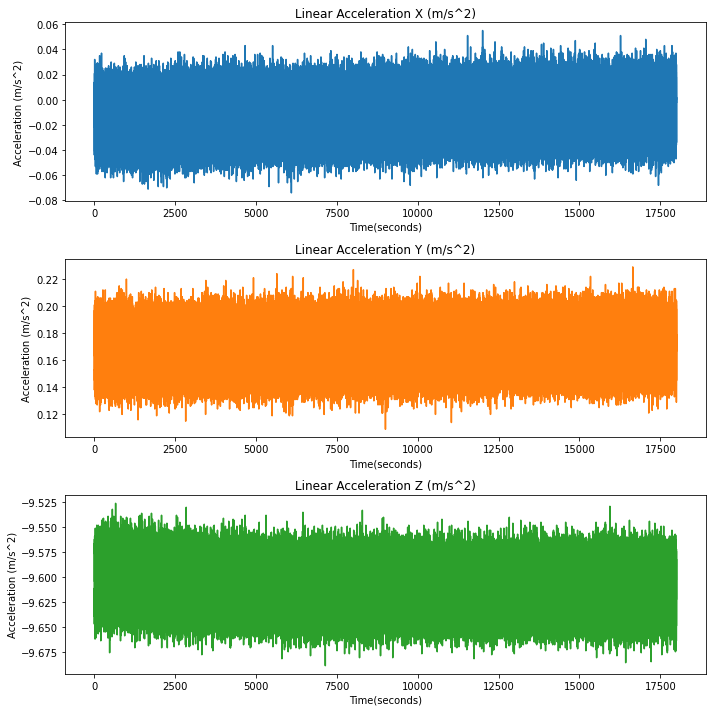

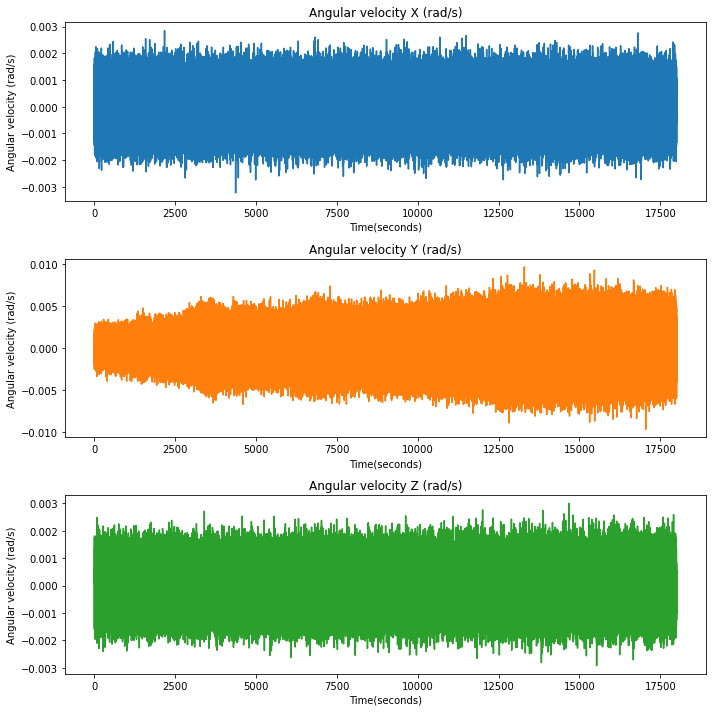

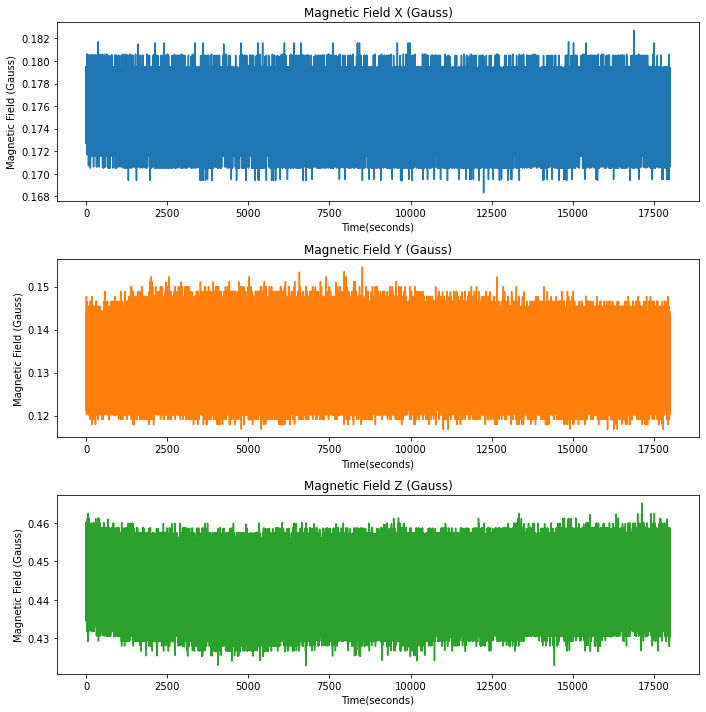

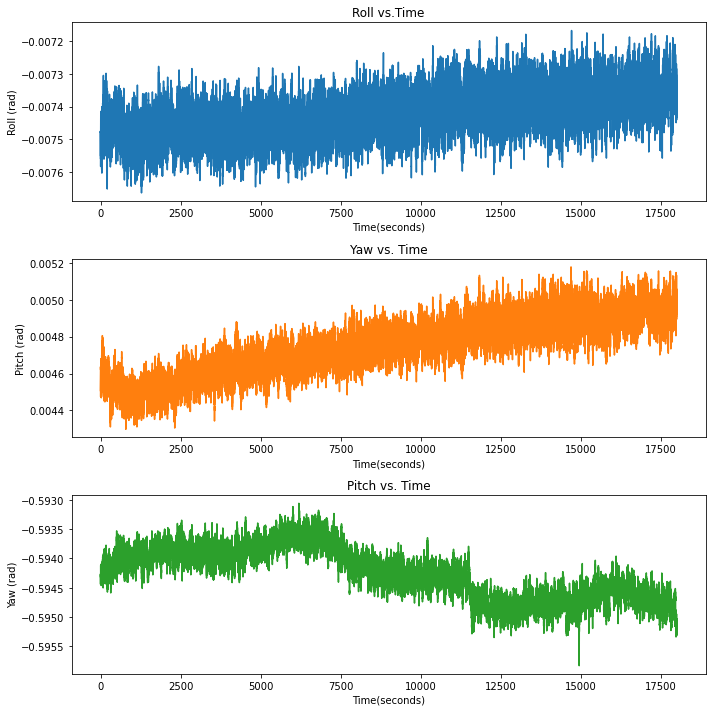

In [10]:
#Lin Accel
fig1, ax1 = plt.subplots(nrows = 3, ncols = 1,figsize = (10,10))
short_lin_accel = long.plot(ax = ax1, subplots =True, x ='Time', y =["IMU.linear_acceleration.x","IMU.linear_acceleration.y","IMU.linear_acceleration.z"], kind = "line")
for i in range(len(ax1)):
    ax1[i].set_xlabel("Time(seconds)")
    ax1[i].set_ylabel("Acceleration (m/s^2)")
    ax1[i].get_legend().remove()
ax1[0].set_title("Linear Acceleration X (m/s^2)")
ax1[1].set_title("Linear Acceleration Y (m/s^2)")
ax1[2].set_title("Linear Acceleration Z (m/s^2)")
plt.tight_layout()

#Ang Vel
fig1, ax1 = plt.subplots(nrows = 3, ncols = 1,figsize = (10,10))
short_ang_vel = long.plot(ax = ax1, subplots =True, x ='Time', y =["IMU.angular_velocity.x","IMU.angular_velocity.y","IMU.angular_velocity.z"], kind = "line")
for i in range(len(ax1)):
    ax1[i].set_xlabel("Time(seconds)")
    ax1[i].set_ylabel("Angular velocity (rad/s)")
    ax1[i].get_legend().remove()
ax1[0].set_title("Angular velocity X (rad/s)")
ax1[1].set_title("Angular velocity Y (rad/s)")
ax1[2].set_title("Angular velocity Z (rad/s)")
plt.tight_layout()

#Magnetic Field
fig1, ax1 = plt.subplots(nrows = 3, ncols = 1,figsize = (10,10))
short_mag_field = long.plot(ax = ax1, subplots =True, x ='Time', y =["MagField.magnetic_field.x","MagField.magnetic_field.y","MagField.magnetic_field.z"], kind = "line")
for i in range(len(ax1)):
    ax1[i].set_xlabel("Time(seconds)")
    ax1[i].set_ylabel("Magnetic Field (Gauss)")
    ax1[i].get_legend().remove()
ax1[0].set_title("Magnetic Field X (Gauss)")
ax1[1].set_title("Magnetic Field Y (Gauss)")
ax1[2].set_title("Magnetic Field Z (Gauss)")
plt.tight_layout()

#Oreientation
fig1, ax1 = plt.subplots(nrows = 3, ncols = 1,figsize = (10,10))
short_mag_field = long.plot(ax = ax1, subplots =True, x ='Time', y =["IMU.orientation.x","IMU.orientation.y","IMU.orientation.z"], kind = "line")
for i in range(len(ax1)):
    ax1[i].set_xlabel("Time(seconds)")
    ax1[i].get_legend().remove()

ax1[0].set_title("Roll vs.Time")
ax1[0].set_ylabel("Roll (rad)")
ax1[1].set_title("Yaw vs. Time")
ax1[1].set_ylabel("Pitch (rad)")
ax1[2].set_title("Pitch vs. Time")
ax1[2].set_ylabel("Yaw (rad)")
plt.tight_layout()

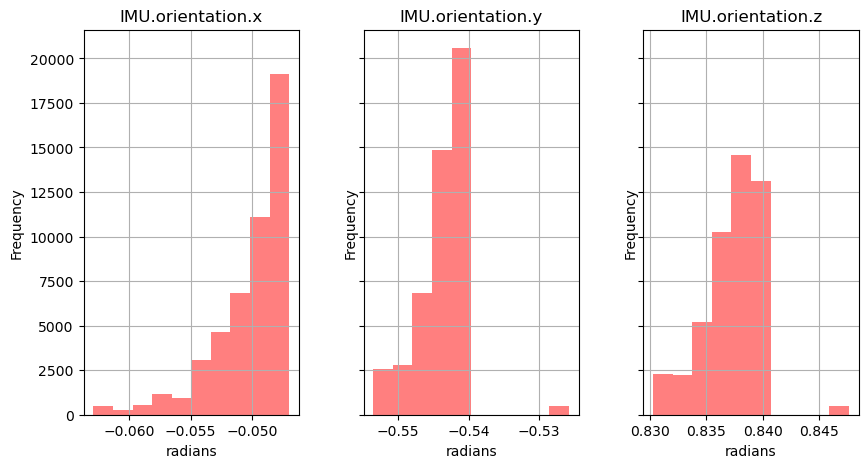

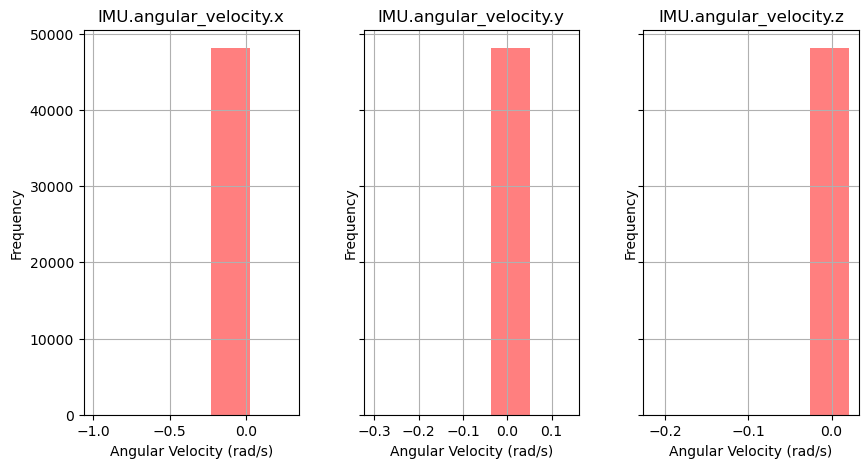

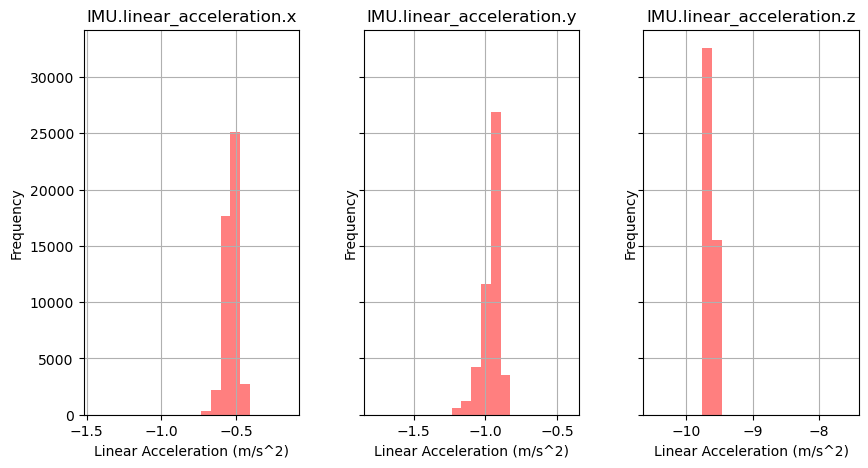

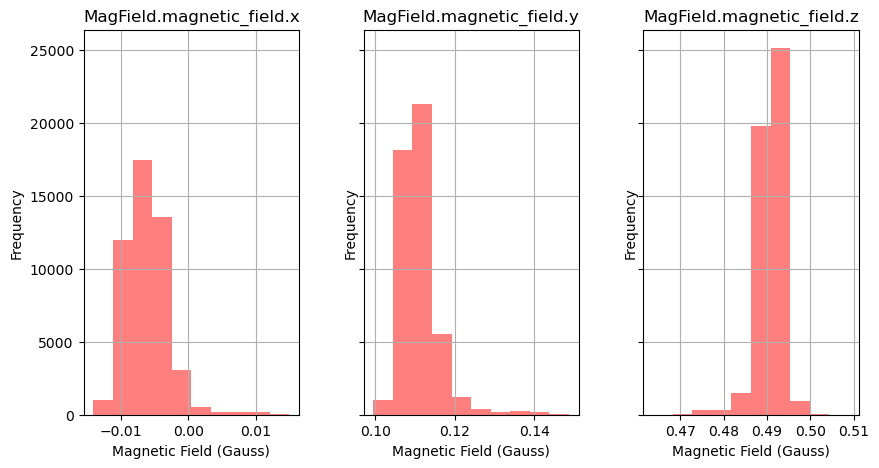

In [33]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(10, 5))

for i in range(3):
    short.hist(column=short.columns[i + 9], bins=10, ax=ax[i], alpha=0.5, color='red')
    ax[i].set_ylabel("Frequency")
    ax[i].set_xlabel("radians")

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(10, 5))

for i in range(3):
    short.hist(column=short.columns[i + 14], bins=5, ax=ax[i], alpha=0.5, color='red')
    ax[i].set_ylabel("Frequency")
    ax[i].set_xlabel("Angular Velocity (rad/s)")

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(10, 5))

for i in range(3):
    short.hist(column=short.columns[i + 18], bins=20, ax=ax[i], alpha=0.5, color='red')
    ax[i].set_ylabel("Frequency")
    ax[i].set_xlabel("Linear Acceleration (m/s^2)")
    
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(10, 5))

for i in range(3):
    short.hist(column=short.columns[i + 26], bins=10, ax=ax[i], alpha=0.5, color='red')
    ax[i].set_ylabel("Frequency")
    ax[i].set_xlabel("Magnetic Field (Gauss)")